# Assignment 5 : Multiple Linear Regression

### Problem Statement

Prepare a prediction model for profit of 50 startups data.
Do transformations for getting better predictions of profit and
make a table containing R_square value for each prepared model.  

R&D Spend -- Research and devolop spend in the past few years  

Administration -- spend on administration in the past few years  

Marketing Spend -- spend on Marketing in the past few years  

State -- states from which data is collected  

Profit  -- profit of each state in the past few years  


In [93]:
# import basic liberaries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
#load data
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [96]:
state_data = df.groupby(df['State']).mean().reset_index()
state_data

,State,R&D Spend,Administration,Marketing Spend,Profit
0,California,64657.674118,120746.507059,182540.929412,103905.175294
1,Florida,80724.016250,121768.897500,247323.551250,118774.024375
2,New York,76195.062353,121543.470588,205346.015882,113756.446471


<AxesSubplot:xlabel='State', ylabel='Profit'>

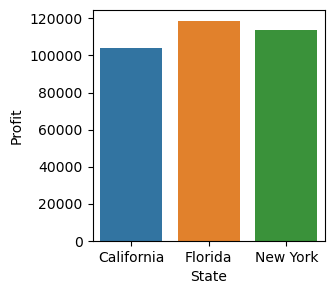

In [97]:
plt.figure(figsize = (3,3))
sns.barplot(x = state_data['State'], y = state_data['Profit'])

In [98]:
#Statistics of df1
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [99]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


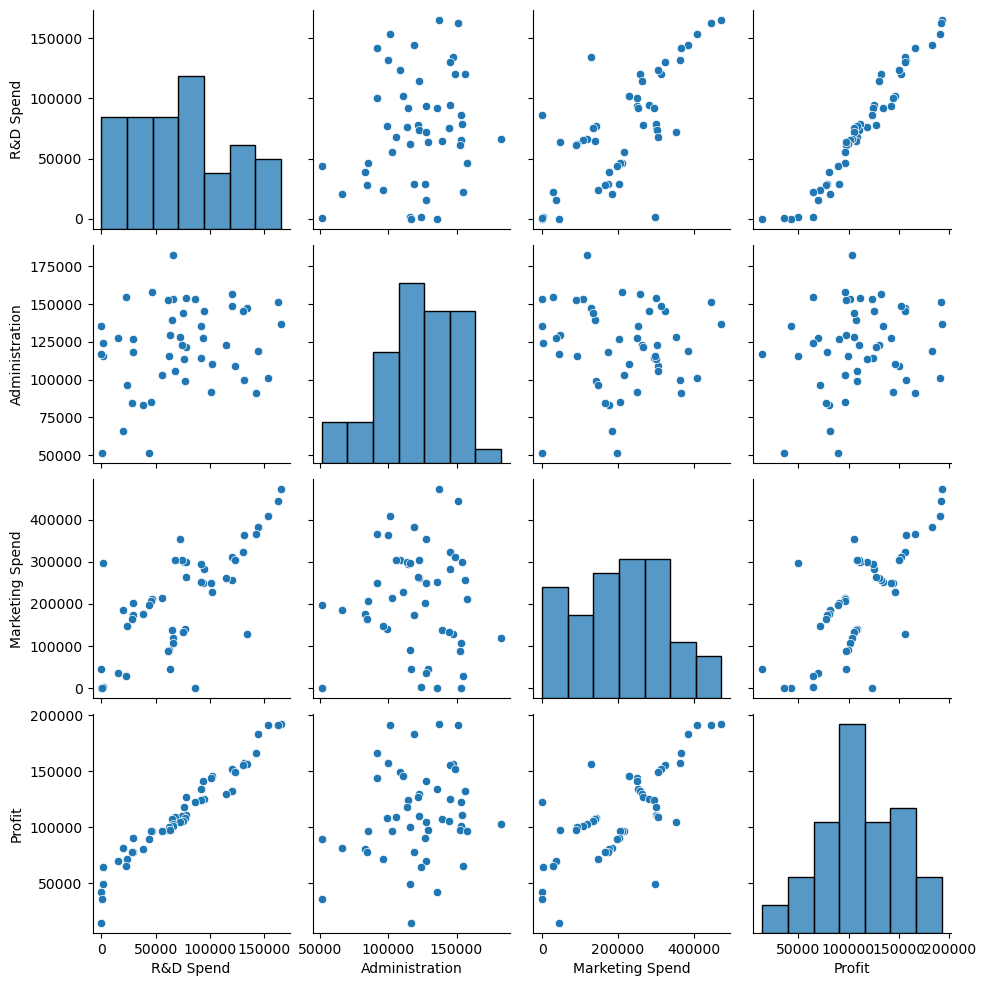

In [100]:
sns.pairplot(data=df)

C:\Users\Renu\AppData\Local\Temp\ipykernel_32488\4233728608.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)


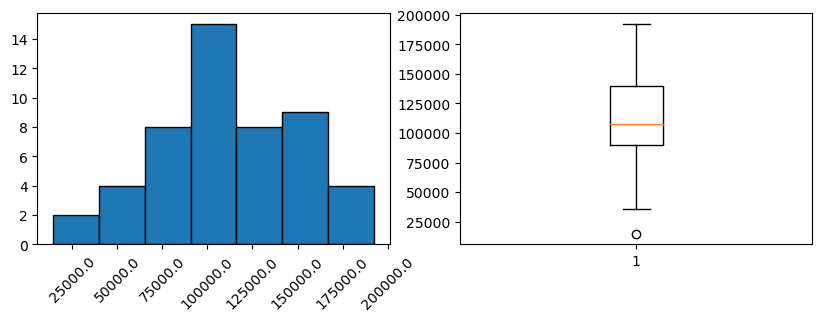

In [101]:
# distribution of the target i.e., profit
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].hist(df['Profit'], bins= 7, edgecolor = 'black')
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)
ax[1].boxplot(df['Profit'])
plt.show()

# Preprocessing

C:\Users\Renu\AppData\Local\Temp\ipykernel_32488\3411356603.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)


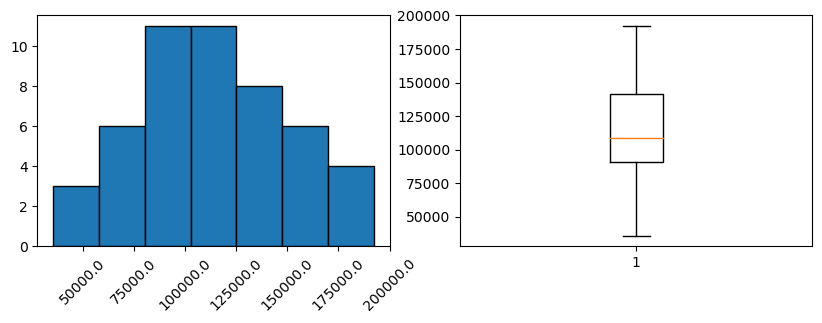

In [102]:
#since there is an outier we will drop the corresponding row/index
df1 = df.drop(df[df.Profit < 25000].index)
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].hist(df1['Profit'], bins= 7, edgecolor = 'black')
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)
ax[1].boxplot(df1['Profit'])
plt.show()

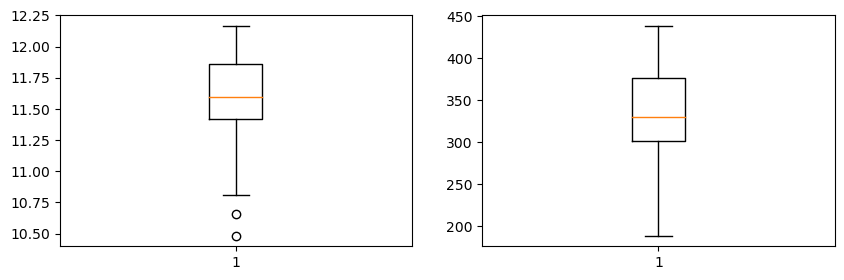

In [103]:
# since the target(profit) is not normally distributed and is negatively skewed we do transformations
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].boxplot(np.log(df1['Profit']))
ax[1].boxplot(np.sqrt(df1['Profit']))
plt.show()

In [104]:
#dummy indicies for State column
df2 = pd.get_dummies(df1)
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


**Since profit is weakly correlated to administration, we may drop that column from the analysis.** 

In [105]:
Data = df2.drop(columns = df2[['Administration', 'Profit']], axis = 1)
Target = df2[['Profit']]

In [106]:
Data.head()

,R&D Spend,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,471784.10,0,0,1
1,162597.70,443898.53,1,0,0
2,153441.51,407934.54,0,1,0
3,144372.41,383199.62,0,0,1
4,142107.34,366168.42,0,1,0


# Model building

In [107]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model1.fit(Data,Target)
model2.fit(Data, np.log(Target))
model3.fit(Data, np.sqrt(Target))

LinearRegression()

In [108]:
print("R square without data transformatin = ", model1.score(Data,Target))
print("R square with log transformation = ", model2.score(Data,np.log(Target)))
print("R square with square root transformation = ", model3.score(Data,np.sqrt(Target)))

R square without data transformatin =  0.9615819564241954
R square with log transformation =  0.8955774293914225
R square with square root transformation =  0.9451429152538641


In [109]:
# writing R_square values in tabilar form
d = {"model": ['no transformation', 'log_transformed','sqrt_transform'],
     "R_square_value": [model1.score(Data,Target), model2.score(Data,np.log(Target)),model3.score(Data,np.sqrt(Target))]}
Result = pd.DataFrame(data = d)
Result

,model,R_square_value
0,no transformation,0.961582
1,log_transformed,0.895577
2,sqrt_transform,0.945143


**Since model 1 has highest R square value(0.96), we select model1 over model 2 and model3**

In [110]:
print("intercept :", model1.intercept_)
print("coefficients :", model1.coef_)

intercept : [49622.04410827]
coefficients : [[ 7.75961710e-01  2.80759461e-02  1.18594024e+03 -4.30608080e+02
  -7.55332156e+02]]


# Model building using Stats OLS

In [111]:
df2.rename({'Marketing Spend':'Marketing_Spend', 'R&D Spend':'RandD_Spend', 'State_New York':'State_NewYork' },
            axis=1, inplace = True)
df2.head(2)

,RandD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


In [112]:
module = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_NewYork",
                 data = df2).fit()
module.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 22 May 2023   Prob (F-statistic):           2.51e-29
Time:                        15:40:51   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
RandD_Spend          0.7836      0.039     20.056      0.000       0.705       0.862
Administration      -0.0220      0.044     -0.505      0.616      -0.110       0.066
Marketing_Spend      0.0258      0.014      1.804      0.078      -0.003       0.055
State_California  1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
State_Florida     1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
State_NewYork     1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     6.13e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Test for Normality of Residuals

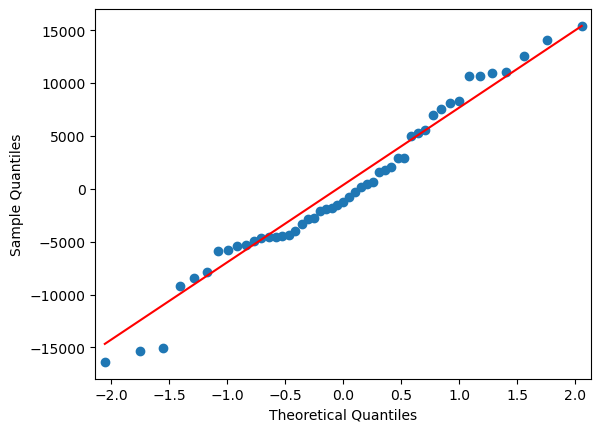

In [113]:
import statsmodels.api as sm
qqplot=sm.qqplot(module.resid,line='q') 

# Residual Plot for Homoscedasticity

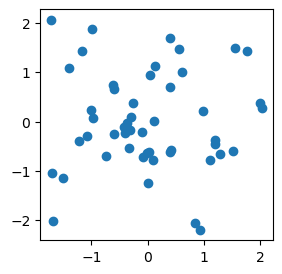

In [114]:
def std( values ):                      #Loop created for return values.
    return (values - values.mean())/values.std()

plt.figure(figsize=(3,3))
plt.scatter(std(module.fittedvalues),
            std(module.resid))

# Residual Vs Regressors

eval_env: 1


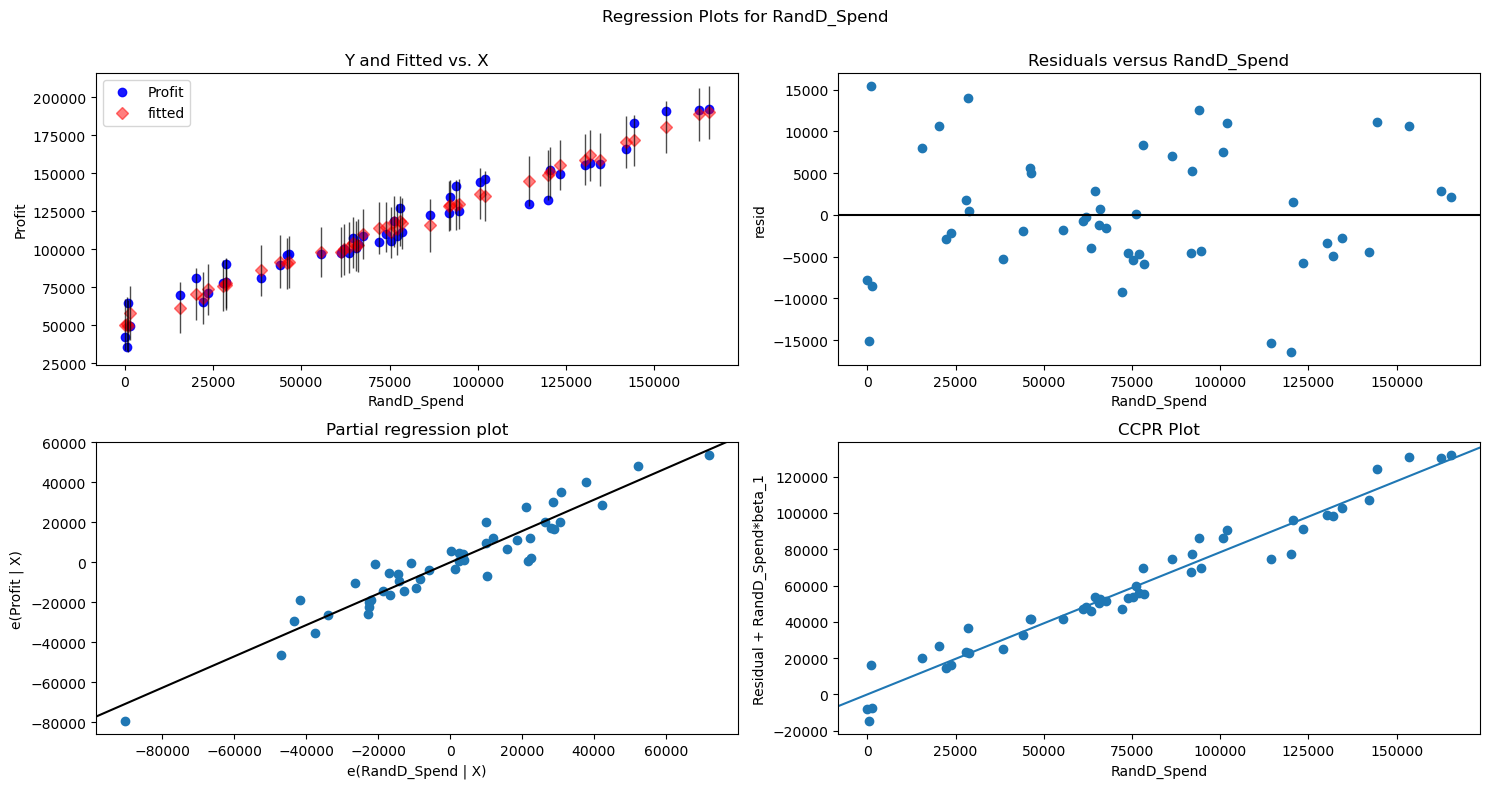

In [115]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module, "RandD_Spend", fig=fig)
plt.show()

eval_env: 1


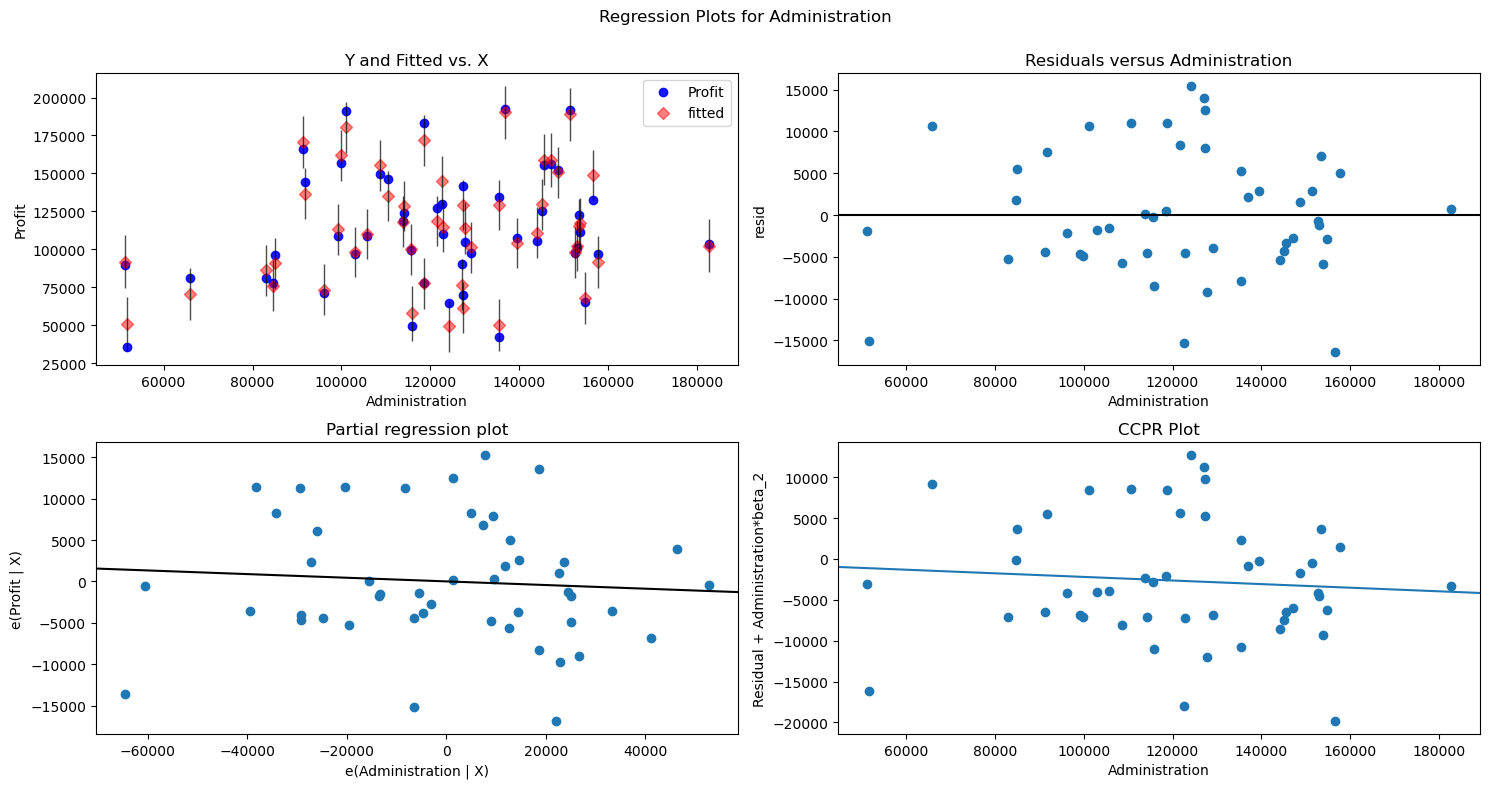

In [116]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module, "Administration", fig=fig)
plt.show()

eval_env: 1


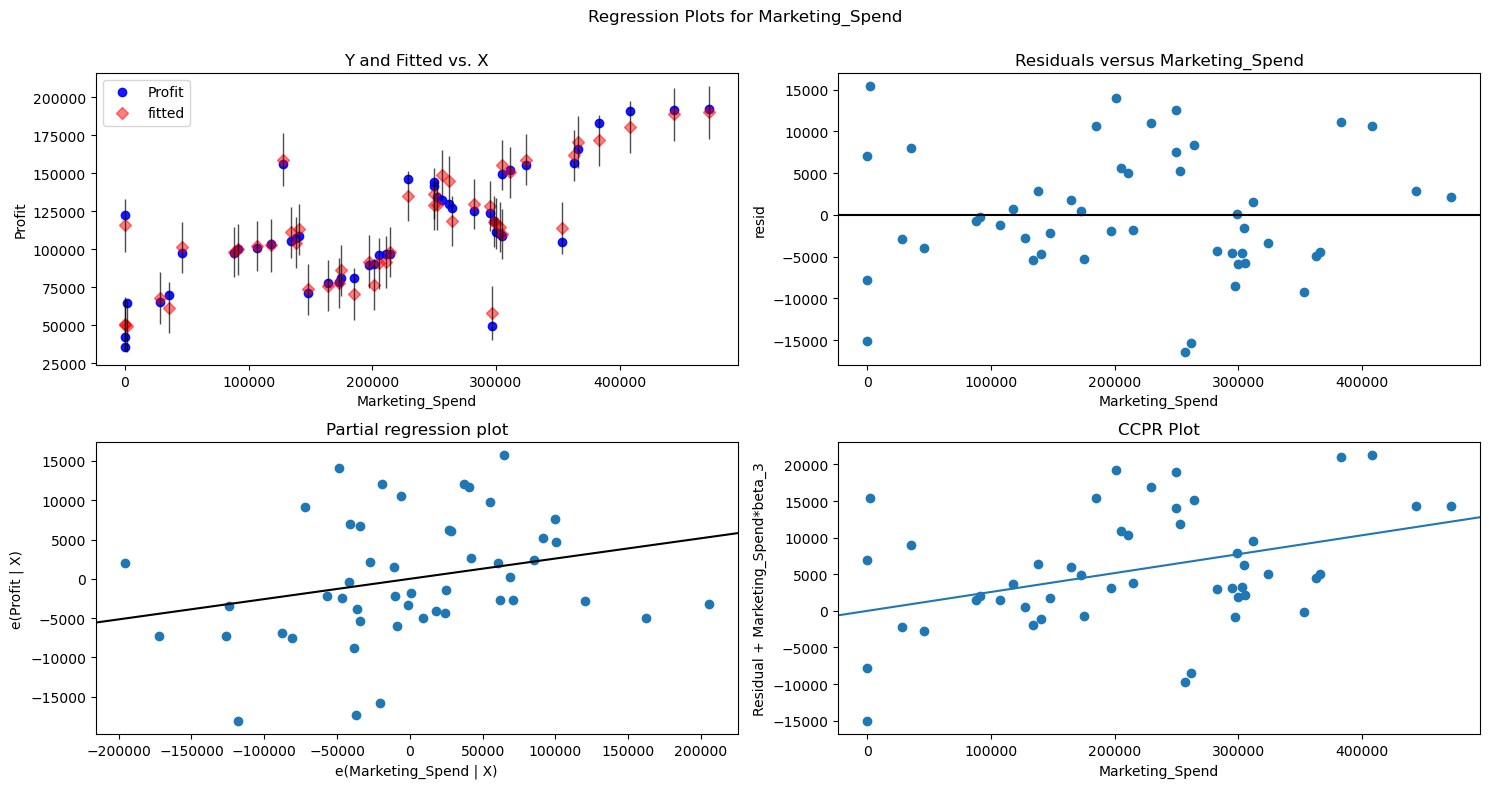

In [117]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics  
**Detecting Influencers/Outliers**

In [118]:
module_influence = module.get_influence()
(c, _) = module_influence.cooks_distance

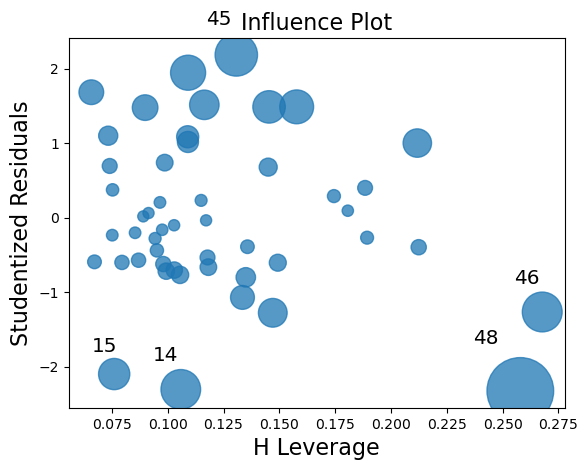

In [119]:

influence_plot(module)
plt.show()

In [120]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(48, 0.24352817571403917)

**Since the value of infuluencer oint is <1 , we don't need to continue the diagnostic process and we can finalize the model**

In [121]:
print("R square and AIC values :", (module.rsquared,module.aic))
print("Following are the model parameters:" "\n", module.params)

R square and AIC values : (0.9618082858227786, 1023.9380387909305)
Following are the model parameters:
 Intercept           39154.863638
RandD_Spend             0.783589
Administration         -0.022022
Marketing_Spend         0.025821
State_California    14224.368528
State_Florida       12660.144283
State_NewYork       12270.350827
dtype: float64
